In [1]:
# cell 1: Install Necessary Libraries
# This command installs PyTorch with Metal Performance Shaders (MPS) support for Apple Silicon,
# then installs Hugging Face's diffusers and transformers libraries, and Pillow for image handling.
# Note: The PyTorch URL specific for 'macOS (ARM)' and 'MPS' backend might change slightly,
# but this is the standard way to get it for M-series chips.
# It's crucial to get the PyTorch version that leverages your M4's GPU.

!pip install torch torchvision torchaudio # Removed --index-url for simplicity; standard install should detect MPS
# For optimal performance on Mac M-series chips, ensure PyTorch installs with MPS backend.
# The default `pip install torch` from PyPI should usually detect and install with MPS if available.

!pip install diffusers transformers accelerate
# To better enable download progress bars and potentially faster downloads, install these:
!pip install huggingface_hub[hf_xet] # For Xet Storage, which can speed up large file downloads
!pip install tqdm # Explicitly install tqdm for progress bar display, often a dependency but good to be sure
!pip install Pillow ipywidgets # Pillow for image saving, ipywidgets for potential future UI elements in Jupyter

print("Cell 1: Installation complete. Restart kernel if prompted by Jupyter after major installs.")


zsh:1: no matches found: huggingface_hub[hf_xet]
Cell 1: Installation complete. Restart kernel if prompted by Jupyter after major installs.


In [2]:
import torch
from diffusers import DiffusionPipeline
import os
from PIL import Image
from IPython.display import display # For displaying images directly in Jupyter Notebook
import datetime

print("Cell 2: Imports complete.")

Cell 2: Imports complete.


In [3]:
# cell 3: Device Configuration
# This checks if Apple's Metal Performance Shaders (MPS) are available.
# MPS allows PyTorch to utilize the GPU on your Mac Mini M4 chip.

if torch.backends.mps.is_available():
    device = "mps"
    print(f"Cell 3: Using Apple Silicon MPS backend for GPU acceleration: {device}")
else:
    device = "cpu"
    print("Cell 3: Apple Silicon MPS backend not available. Falling back to CPU. "
          "Image generation will be significantly slower.")
    print("Please ensure your PyTorch installation supports MPS for optimal performance.")
    

Cell 3: Using Apple Silicon MPS backend for GPU acceleration: mps


In [4]:
# cell 4: Load the Stable Diffusion Model
# use Stability AI's Stable Diffusion XL (SDXL) base model.
# This model is quite large (several GBs) and will be downloaded the first time when running this cell
# Subsequent runs will use the cached model from your local drive.
# The 'torch_dtype=torch.float16' helps reduce memory usage, which is beneficial for unified memory.

model_id = "stabilityai/stable-diffusion-xl-base-1.0"

print(f"Cell 4: Loading Stable Diffusion model: {model_id}. This may take a while for the first download (~5-10GB).")
print("If you don't see a progress bar, the download is still happening in the background.")
print("You might see progress updates in the terminal where you launched Jupyter.")

try:
    # Load the pipeline. Ensure the revision is specific for fp16 if available for MPS to optimize memory.
    # Note: On some systems, `torch_dtype=torch.float16` might require `fp16` revision.
    # For robust MPS support, sometimes `load_safety_checker=False` is used for faster loading or if issues arise.
    
    pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
    
    # Move the model to the MPS device
    pipe = pipe.to(device)
    
    # Optional: If you want to use a refiner model for better quality (requires more VRAM/unified memory)
    # from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
    # refiner = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16)
    # refiner = refiner.to(device)
    # pipe.refiner = refiner # Attach refiner to the base pipeline if you plan to use it

    print("Cell 4: Stable Diffusion model loaded successfully and moved to MPS.")
    print("Unified Memory (RAM) Recommendation for SDXL: 16GB or more for best performance and stability.")

except Exception as e:
    print(f"Cell 4: Error loading the model: {e}")
    print("Please check your internet connection for the initial download, "
          "and ensure you have enough disk space and unified memory.")
    pipe = None # Ensure pipe is None if loading fails

Cell 4: Loading Stable Diffusion model: stabilityai/stable-diffusion-xl-base-1.0. This may take a while for the first download (~5-10GB).
If you don't see a progress bar, the download is still happening in the background.
You might see progress updates in the terminal where you launched Jupyter.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Cell 4: Stable Diffusion model loaded successfully and moved to MPS.
Unified Memory (RAM) Recommendation for SDXL: 16GB or more for best performance and stability.



Cell 5: Starting Image Generation Session.
Images will be saved to 'generated_images'.
Enter your text prompt to generate an image. Type 'exit' or 'quit' to end.


Enter prompt (or 'exit'/'quit'):  A lone, ethereal creature, its fur like midnight velvet, with luminous eyes, stands majestically in the heart of a vibrant, bioluminescent midnight jungle. Fireflies swarm around ancient, glowing trees, their branches softly pulsating with light. Dense mist swirls, illuminated by the faint glow of exotic flora. Hyperdetailed, photorealistic, cinematic lighting, ultra high definition, mystical, fantasy art, volumetric light.


Token indices sequence length is longer than the specified maximum sequence length for this model (90 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ultra high definition, mystical, fantasy art, volumetric light.']
Token indices sequence length is longer than the specified maximum sequence length for this model (90 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ultra high definition, mystical, fantasy art, volumetric light.']


Generating image for prompt: 'A lone, ethereal creature, its fur like midnight velvet, with luminous eyes, stands majestically in the heart of a vibrant, bioluminescent midnight jungle. Fireflies swarm around ancient, glowing trees, their branches softly pulsating with light. Dense mist swirls, illuminated by the faint glow of exotic flora. Hyperdetailed, photorealistic, cinematic lighting, ultra high definition, mystical, fantasy art, volumetric light.'...


  0%|          | 0/60 [00:00<?, ?it/s]

Image saved to: generated_images/generated_image_20250621_131612_A_lone_ethereal_creature_its_fur_like_midnight_vel.png


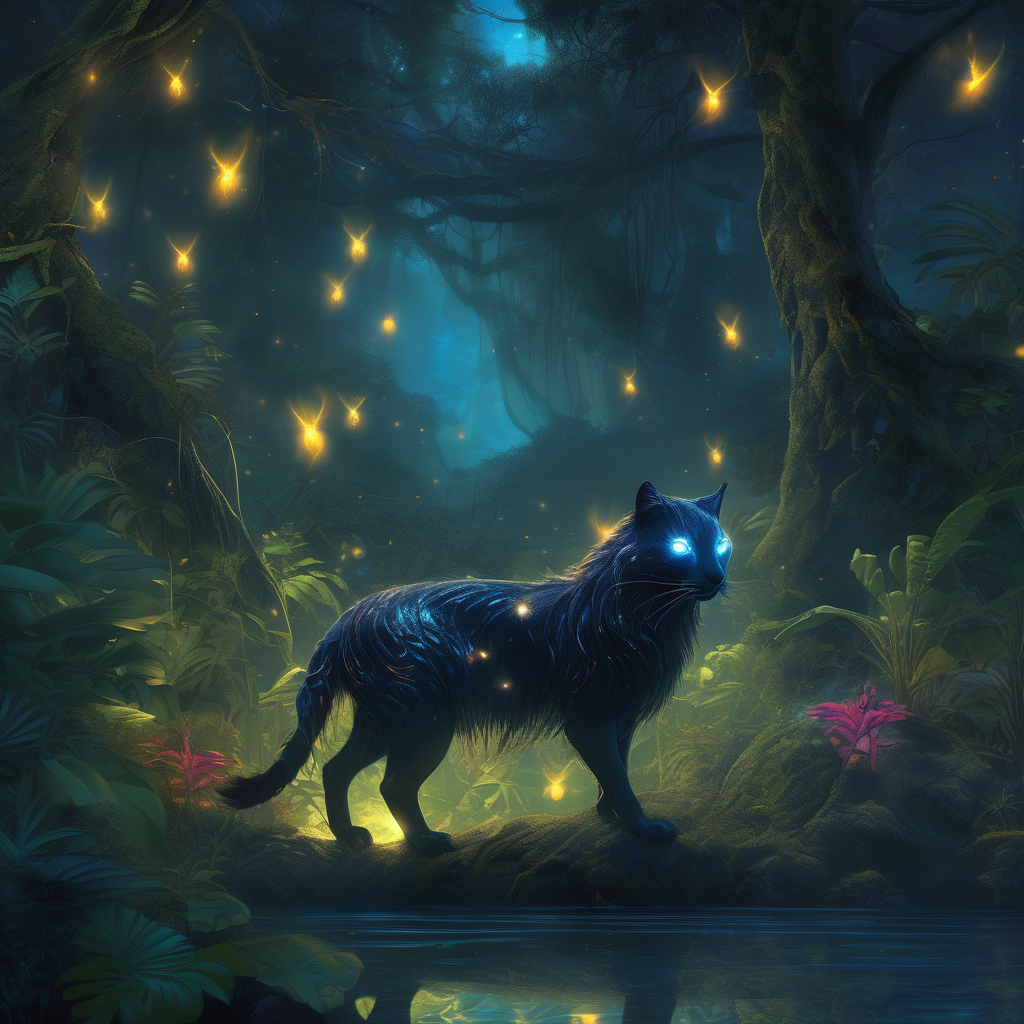

Enter prompt (or 'exit'/'quit'):  Generate me a stickman with fox head call Stickfox! 


Generating image for prompt: 'Generate me a stickman with fox head call Stickfox!'...


  0%|          | 0/60 [00:00<?, ?it/s]

Image saved to: generated_images/generated_image_20250621_132227_Generate_me_a_stickman_with_fox_head_call_Stickfox.png


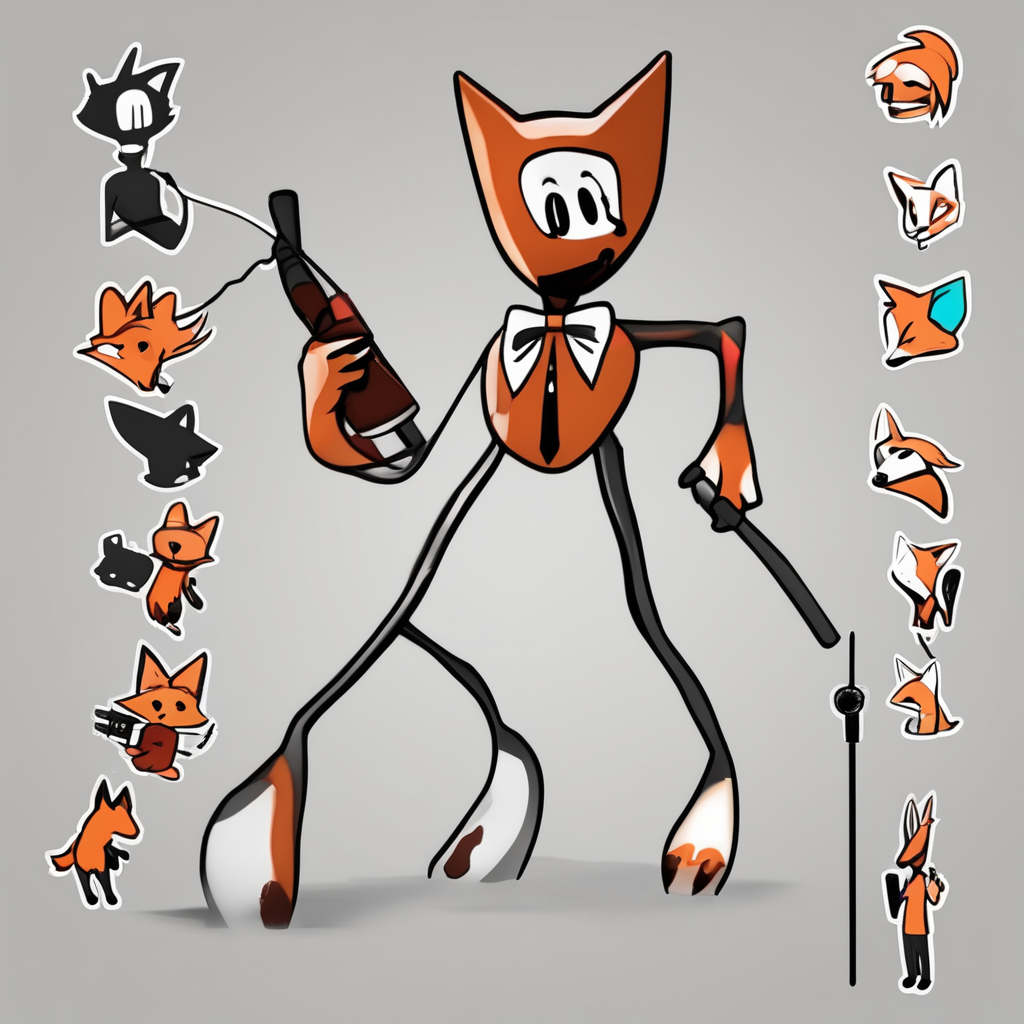

Enter prompt (or 'exit'/'quit'):  exit


Exiting image generation session. Goodbye!


In [6]:
# cell 5: Image Generation Loop

if pipe is None:
    print("Model was not loaded in Cell 4. Cannot proceed with image generation.")
else:
    output_dir = "generated_images"
    os.makedirs(output_dir, exist_ok=True)
    print(f"\nCell 5: Starting Image Generation Session.")
    print(f"Images will be saved to '{output_dir}'.")
    print("Enter your text prompt to generate an image. Type 'exit' or 'quit' to end.")

    image_count = 0
    while True:
        prompt = input("Enter prompt (or 'exit'/'quit'): ").strip()

        if prompt.lower() in ['exit', 'quit']:
            print("Exiting image generation session. Goodbye!")
            break

        if not prompt:
            print("Prompt cannot be empty. Please try again.")
            continue

        print(f"Generating image for prompt: '{prompt}'...")
        try:
            # Generate the image
            # in `num_inference_steps` (e.g., 25-50 is common), the more value it is the smarter it is and slower it is
            # `guidance_scale` (e.g., 7.5-10 for creativity vs. adherence to prompt).
            # Lower num_inference_steps speeds up generation but might reduce quality.
            
            generated_image = pipe(
                prompt=prompt,
                num_inference_steps=30, # Default is often 50, lower for faster results
                guidance_scale=3.5    # How much to guide the generation by the prompt
            ).images[0]
            
            # Generate a timestamp for the filename
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

            clean_prompt_part = "".join(c for c in prompt if c.isalnum() or c in (' ', '.', '_')).strip()
            # Truncate prompt part to avoid extremely long filenames
            if len(clean_prompt_part) > 50:
                clean_prompt_part = clean_prompt_part[:50].strip() + "..."
            
            file_name = os.path.join(output_dir, f"generated_image_{timestamp}_{clean_prompt_part}.png")
            file_name = file_name.replace(" ", "_").replace("...", "") # Further clean up
            
            generated_image.save(file_name)
            print(f"Image saved to: {file_name}")

            # Display the image in the Jupyter Notebook output
            display(generated_image)

        except Exception as e:
            print(f"An error occurred during image generation: {e}")
            print("You might be running out of unified memory, or there's an issue with the model.")
